![license_header_logo](https://user-images.githubusercontent.com/59526258/124226124-27125b80-db3b-11eb-8ba1-488d88018ebb.png)
> **Copyright (c) 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

# Introduction

Feature engineering is a machine learning techniques for extracting new features from raw data.
In this notebook, we will explore on different types of feature engineering techniques:
1. Imputation
2. One-hot encoding for categorical data.
3. Categorize numerical data.
4. Engineer outlier

# Learning Outcome
By the end of this notebook, you should be able to know on how to:
1. Perform feature engineering for missing values. 
2. Handling categorical data (binary, nominal, ordinal)
3. Implement feature engineering for numerical data.
4. Handling outlier values

# Table Of Contents
* [Missing values](#missing)
* [Categorical data](#category)
* [Numerical data](#numeric)
* [Outlier](#outlier)
* [Exercise ](#exercise)

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.stats.mstats import winsorize

In [2]:
# Dataset of employee
df = pd.DataFrame({
    "Employee ID" : ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109'],
    "Department" : ["Finance", "IT", "Sales", "Human Resource", "Finance", "IT", "Sales", "Finance", "Sales", "IT"],
    "Age" : [24, np.nan, 18, 28, 29, 28, 30, 35, np.nan, 35],
    "Gender" : ["F", "M", "F", "F", "F", "M", "M", "M", "F", "F"],
    "Education" : ["Diploma", "Diploma", "SPM", "Degree", "Degree", "SPM", "Degree", "SPM", "Diploma", "Degree"]
    })

In [3]:
# Change Employee ID as int data type
df['Employee ID'] = df['Employee ID'].astype(int)

In [4]:
df.head()

,Employee ID,Department,Age,Gender,Education
0,100,Finance,24.0,F,Diploma
1,101,IT,NaN,M,Diploma
2,102,Sales,18.0,F,SPM
3,103,Human Resource,28.0,F,Degree
4,104,Finance,29.0,F,Degree


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee ID  10 non-null     int32  
 1   Department   10 non-null     object 
 2   Age          8 non-null      float64
 3   Gender       10 non-null     object 
 4   Education    10 non-null     object 
dtypes: float64(1), int32(1), object(3)
memory usage: 488.0+ bytes


# <a name="typeformat">Missing Values

There are two methods to handle missing values:
1. <b>Delete information</b> that has missing value in it
    * Delete entire column
    * Delete entire rows
    
    
2. <b>Imputation</b>
    * Impute using mean 
    * Impute using mode

In [6]:
# Print the value that has missing values
df.isnull().sum()

Employee ID    0
Department     0
Age            2
Gender         0
Education      0
dtype: int64

## Deleting value
Delete certain row or column with missing data.

### Column

In [7]:
del_column = df.dropna(axis=1)

In [8]:
del_column.head()

,Employee ID,Department,Gender,Education
0,100,Finance,F,Diploma
1,101,IT,M,Diploma
2,102,Sales,F,SPM
3,103,Human Resource,F,Degree
4,104,Finance,F,Degree


### Row

In [9]:
del_row = df.dropna(axis=0)

In [10]:
del_row.head()

,Employee ID,Department,Age,Gender,Education
0,100,Finance,24.0,F,Diploma
2,102,Sales,18.0,F,SPM
3,103,Human Resource,28.0,F,Degree
4,104,Finance,29.0,F,Degree
5,105,IT,28.0,M,SPM


## Imputation
Replace missing data with statistical estimates or frequently occured value of the variable. 

Numerical value:
1. Mean
2. Mode
3. Median

Categorical value:
1. Frequently use value or mode imputation.
2. Adding a "missing"/"unknown" category.

In this exercise we will show on how to impute missing values by using mean or mode.

### Mean
Fill up the missing value with mean.

In [11]:
mean = df.fillna(df.mean().astype(int)) 

In [12]:
mean.head()

,Employee ID,Department,Age,Gender,Education
0,100,Finance,24.0,F,Diploma
1,101,IT,28.0,M,Diploma
2,102,Sales,18.0,F,SPM
3,103,Human Resource,28.0,F,Degree
4,104,Finance,29.0,F,Degree


### Mode
Fill up the missing value with mode.

In [13]:
mode = df.fillna(df.mode())

In [14]:
mode.head()

,Employee ID,Department,Age,Gender,Education
0,100,Finance,24.0,F,Diploma
1,101,IT,35.0,M,Diploma
2,102,Sales,18.0,F,SPM
3,103,Human Resource,28.0,F,Degree
4,104,Finance,29.0,F,Degree


# <a name="category">Categorical data
Carry out feature engineering process on binary, nominal and ordinal categorical column.

In [15]:
# Print unique value of cat_df
for i in df.columns:
    if df.dtypes[i] == 'object':
        print("Column: {}".format(i))
        print(df[i].unique())

Column: Department
['Finance' 'IT' 'Sales' 'Human Resource']
Column: Gender
['F' 'M']
Column: Education
['Diploma' 'SPM' 'Degree']


From the result above, here is the list of categorical data:
* Binary : Gender
* Nominal : Department
* Ordinal : Education

## Binary Data
Perform one-hot encoding by using `pd.get_dummies`. It converts categorical variable into dummy/indicator variables for each category.<br>

The column for the first category of our data will be removed by using the `drop_first=True` because it will contain the same information as the new column of the second category or for multiple categories, its information will be captured in the rest of the columns. It will be removed to prevent data redundancy in out dataset.

In [16]:
df = pd.get_dummies(data=df, columns=['Gender'], drop_first=True)

In [17]:
df = df.rename(columns={"Gender_M":"Gender"})

In [18]:
df.head()

,Employee ID,Department,Age,Education,Gender
0,100,Finance,24.0,Diploma,0
1,101,IT,NaN,Diploma,1
2,102,Sales,18.0,SPM,0
3,103,Human Resource,28.0,Degree,0
4,104,Finance,29.0,Degree,0


Take a quick look on Gender column, value 1 represents male and 0 represents female.

## Nominal Data
They are two methods to perform feature engineering for nominal data:
### Label Encoding 

In [19]:
# make a copy of our data
df_encode = df.copy()

In [20]:
label_encoder = preprocessing.LabelEncoder()

In [21]:
df_encode['Department'] = label_encoder.fit_transform(df_encode['Department'])

In [22]:
df_encode.head()

,Employee ID,Department,Age,Education,Gender
0,100,0,24.0,Diploma,0
1,101,2,NaN,Diploma,1
2,102,3,18.0,SPM,0
3,103,1,28.0,Degree,0
4,104,0,29.0,Degree,0


Label encoding uses alphabetical ordering. The values in 'Department' column will result in the following order :<br>
<b>Finance > Human Resource > IT > Sales</b><br>

Department names do not have an order or rank. When label encoding is performed, it will create order relationship between the categories. Thus, label encoding is less preferred when transforming nominal data. It is most commonly used to transform target variable only.

### One-Hot Encoding

In [23]:
df = pd.get_dummies(data=df, columns=['Department'])

In [24]:
df.head()

,Employee ID,Age,Education,Gender,Department_Finance,Department_Human Resource,Department_IT,Department_Sales
0,100,24.0,Diploma,0,1,0,0,0
1,101,NaN,Diploma,1,0,0,1,0
2,102,18.0,SPM,0,0,0,0,1
3,103,28.0,Degree,0,0,1,0,0
4,104,29.0,Degree,0,1,0,0,0


**Challenges of One-Hot Encoding**
* Expands feature space
* Many features may look identical, this will lead to redundant information.

## Ordinal data
Data that introduces an order between them for example grade, review or ranking.

In [25]:
# Creating dictionary for mapping the ordinal numerical value
education_dict = {'SPM':1, 'Diploma':2, 'Degree':3}

# Assigning ordinal numerical value to all types of education
df['Education'] = df['Education'].map(education_dict)

In [26]:
df.head()

,Employee ID,Age,Education,Gender,Department_Finance,Department_Human Resource,Department_IT,Department_Sales
0,100,24.0,2,0,1,0,0,0
1,101,NaN,2,1,0,0,1,0
2,102,18.0,1,0,0,0,0,1
3,103,28.0,3,0,0,1,0,0
4,104,29.0,3,0,1,0,0,0


It is best practice to manually convert variables to numeric values.

# <a name="numeric">Numeric data
Categorize values in Age columns according to their age stages.

In [27]:
# Slice age values
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 30, 35, 40])

In [28]:
df.head()

,Employee ID,Age,Education,Gender,Department_Finance,Department_Human Resource,Department_IT,Department_Sales,Age_Group
0,100,24.0,2,0,1,0,0,0,"(18.0, 25.0]"
1,101,NaN,2,1,0,0,1,0,NaN
2,102,18.0,1,0,0,0,0,1,"(0.0, 18.0]"
3,103,28.0,3,0,0,1,0,0,"(25.0, 30.0]"
4,104,29.0,3,0,1,0,0,0,"(25.0, 30.0]"


# <a name="outlier">Handling Outlier</a>
## Outlier?
Mathematically, outlier is a point which it is significant greater or lower than other data values.

## Find Outlier using Boxplot
<img src="https://matplotlib.org/3.2.2/_images/boxplot_explanation.png" width="500"/>

[Image Source: Matplotlib](https://matplotlib.org/3.2.2/faq/howto_faq.html)

## Understand Boxplot
- Boxplot is a method to display the distribution of data
- The Interquartile Range(IQR) indicates the range where most data is spread. We can use it to observe the spread of data. In other words, the data is concentrated in the IQR. 

In [29]:
student = df = pd.DataFrame({
    "Student ID" : ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109'],
    "Marks" : [75, 62, 1, 66, 80, 194, 80, 90, 2, 65]
    })

In [30]:
student

,Student ID,Marks
0,100,75
1,101,62
2,102,1
3,103,66
4,104,80
5,105,194
6,106,80
7,107,90
8,108,2
9,109,65


## Interquartile Range (IQR)
Interquartile range, Q3-Q1

In [31]:
# sort in increasing order
sorted(student['Marks'])

[1, 2, 62, 65, 66, 75, 80, 80, 90, 194]

In [32]:
# find q1(25%) and q3(75%)
q1, q3 = np.percentile(student['Marks'],[25,75])
print(q1, q3)

62.75 80.0


In [33]:
# find IQR
IQR = q3 - q1
print(IQR)

17.25


In [34]:
# find lower bound and upper bound
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

print(lower_bound, upper_bound)

36.875 105.875


As you can see from the example above, if the marks are below the lower boundary and above the upper boundary, they are considered outliers.

<AxesSubplot:>

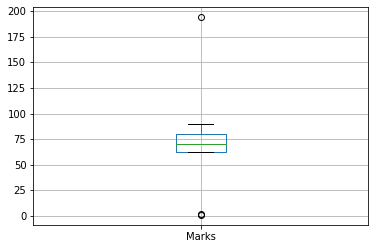

In [35]:
student.boxplot()

Visualize outlier in boxplot.

## Trimming

In [36]:
stud_trim = student.copy() # copy so we does not make change to original dataset

In [37]:
# remove the outlier value in "Marks" column
stud_trim.loc[stud_trim['Marks'] < lower_bound, 'Marks'] = np.nan
stud_trim.loc[stud_trim['Marks'] > upper_bound, 'Marks'] = np.nan

<AxesSubplot:>

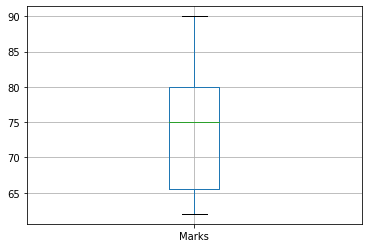

In [38]:
stud_trim.boxplot()

The outlier has been successfully removed from the 'Marks' column.

## Winsorizing

In [39]:
stud_winsor = student.copy()

In [40]:
stud_winsor

,Student ID,Marks
0,100,75
1,101,62
2,102,1
3,103,66
4,104,80
5,105,194
6,106,80
7,107,90
8,108,2
9,109,65


In [41]:
stud_winsor['Marks'] = winsorize(stud_winsor['Marks'], limits=[0.25, 0.1])

<AxesSubplot:>

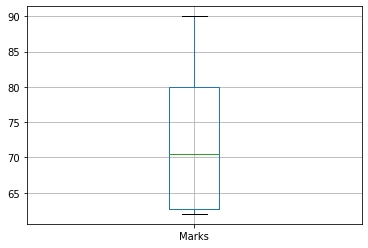

In [42]:
stud_winsor.boxplot()

In [43]:
stud_winsor

,Student ID,Marks
0,100,75
1,101,62
2,102,62
3,103,66
4,104,80
5,105,90
6,106,80
7,107,90
8,108,62
9,109,65


As you can see from the table above, the dataset has been winsorized such that the extreme values (outliers) are being replaced by the lowest and highest value of our dataset.

# <a name="exercise">Exercise
Perform feature engineering based on dataset given below.

In [44]:
food = pd.read_csv('../data/food_preference.csv')

In [45]:
food.head()

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe


<b>You may follow guidelines below to begin this exercise. Good luck! 

In [46]:
# Step 1 : Check if there is missing value
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       288 non-null    object
 1   Participant_ID  288 non-null    object
 2   Gender          284 non-null    object
 3   Nationality     288 non-null    object
 4   Age             288 non-null    int64 
 5   Food            288 non-null    object
 6   Juice           288 non-null    object
 7   Dessert         288 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.1+ KB


In [47]:
# Step 2 : Deleting row that contain null value
food.dropna(axis=0, inplace=True)

In [48]:
# Step 3 : Find unique values for categorical columns only

# remove 'Timestamp' and 'Participant_ID' columns
cat_df = food[food.columns.difference(['Timestamp', 'Participant_ID'])]

# Print unique value of cat_df
for i in cat_df.columns:
    if cat_df.dtypes[i] == 'object':
        print("Column: {}".format(i))
        print(cat_df[i].unique())

Column: Dessert
['Maybe' 'Yes' 'No']
Column: Food
['Traditional food' 'Western Food']
Column: Gender
['Male' 'Female']
Column: Juice
['Fresh Juice' 'Carbonated drinks']
Column: Nationality
['Indian' 'Pakistani ' 'Tanzanian' 'Indonesia' 'Pakistan' 'Maldivian '
 'MY' 'Malaysian' 'Malaysian ' 'Indonesian ' 'Maldivian' 'MALAYSIAN'
 'Malaysia ' 'Pakistani' 'Canadian' 'Nigerian ' 'Algerian ' 'Korean '
 'Seychellois' 'Indonesain' 'Indonesian' 'Malaysia' 'Japan' 'China'
 'Mauritian' 'Yemen']


In [49]:
# Step 4 : Standardize Nationality values to malaysian and non-malaysian

# Hint : use this values
nationality = {
    "malaysian" : "malaysian",
    "indian" : "non-malaysian",
    "pakistani" : "non-malaysian",
    "tanzanian" : "non-malaysian",
    "indonesia" : "non-malaysian",
    "pakistan" : "non-malaysian",
    "maldivian" : "non-malaysian",
    "my" : "malaysian",
    "indonesian" : "non-malaysian",
    "malaysia" : "malaysian",
    "canadian" : "non-malaysian",
    "nigerian" : "non-malaysian",
    "algerian" : "non-malaysian",
    "korean" : "non-malaysian",
    "seychellois" : "non-malaysian",
    "indonesain" : "non-malaysian",
    "japan" : "non-malaysian",
    "china" : "non-malaysian",
    "mauritian" : "non-malaysian",
    "yemen" : "non-malaysian"
}

# Start your solution here
food["Nationality"] = food["Nationality"].apply(str.lower).apply(str.strip).apply(lambda x:nationality[x])

In [50]:
# Step 5 : Perform feature engineering for the rest of categorical data

cat_df = food[food.columns.difference(['Timestamp', 'Participant_ID', 'Age'])]

# Start your solution here
food = pd.get_dummies(food, columns=cat_df.columns, drop_first=True)

In [51]:
# Step 6(Bonus) : Extract date from 'Timestamp column'

import datetime
# Hint : New date format %d%m%Y

def date_convert(date_to_convert):
    try:
        return datetime.datetime.strptime(date_to_convert, "%Y/%m/%d %H:%M:%S %p GMT+8").strftime('%d/%m/%Y')
    except:
        return "Error"

# Start your solution here
food['new_date'] = food['Timestamp'].apply(date_convert)

In [52]:
food.head()

,Timestamp,Participant_ID,Age,Dessert_No,Dessert_Yes,Food_Western Food,Gender_Male,Juice_Fresh Juice,Nationality_non-malaysian,new_date
0,2019/05/07 2:59:13 PM GMT+8,FPS001,24,0,0,0,1,1,1,07/05/2019
1,2019/05/07 2:59:45 PM GMT+8,FPS002,22,0,1,1,0,0,1,07/05/2019
2,2019/05/07 3:00:05 PM GMT+8,FPS003,31,0,0,1,1,1,1,07/05/2019
3,2019/05/07 3:00:11 PM GMT+8,FPS004,25,0,0,0,0,1,1,07/05/2019
4,2019/05/07 3:02:50 PM GMT+8,FPS005,27,0,0,0,1,1,1,07/05/2019


Congratulations, now you have a better understanding of how to include feature engineering in your project.

# Further Readings
* <a href=https://heartbeat.comet.ml/hands-on-with-feature-engineering-techniques-encoding-categorical-variables-be4bc0715394>More feature engineering techniques</a>